## Titanic Data Anaysis Project

In [1]:
import pandas as pd

In [2]:
titanic_df=pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### First some basic questions:

1) Who were the passengers on the Titanic? (Age,Gender,Class,..etc)

2) What deck were the passengers on and how does that relate to their class?

3) Where did the passengers come from?

4) Who was alone and who was with family?

###### Then we'll dig deeper, with a broader question:

5) What factors helped someone survive the sinking?

6) Did the deck have an effect on the passengers survival rate? 

7) Did having a family member increase the odds of surviving the crash?

###### So let's start with the first question: 
###### 1) Who were the passengers on the Titanic?

In [5]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

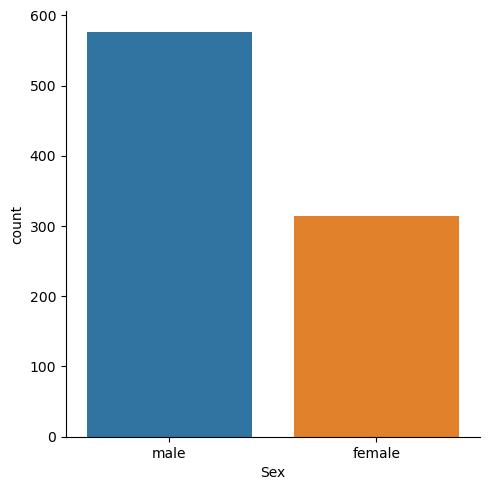

In [6]:
# Let's first check gender
sns.catplot(data=titanic_df,x='Sex',kind='count')

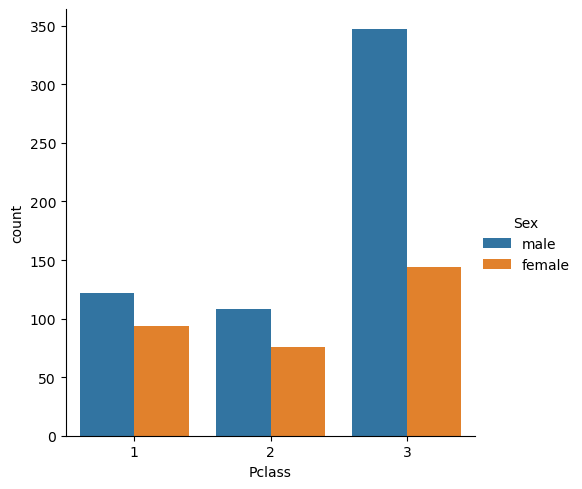

In [7]:
sns.catplot(data=titanic_df,x='Pclass',hue='Sex',kind='count')

In [8]:
# Conclusions:
# Much more of the third class was male 
# There were more males than females in all the classes

In [9]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else: 
        return sex

In [10]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


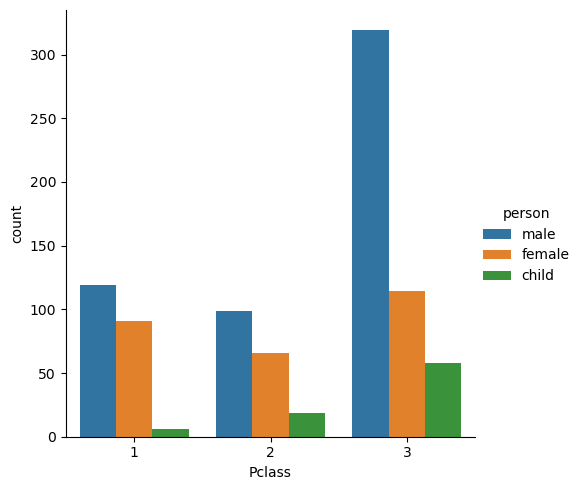

In [12]:
sns.catplot(data=titanic_df,x='Pclass',hue='person',kind='count')

In [13]:
# When we excluded chidren(<16years) from our data, we can see that the difference between males and females increased in all the classes

<AxesSubplot:>

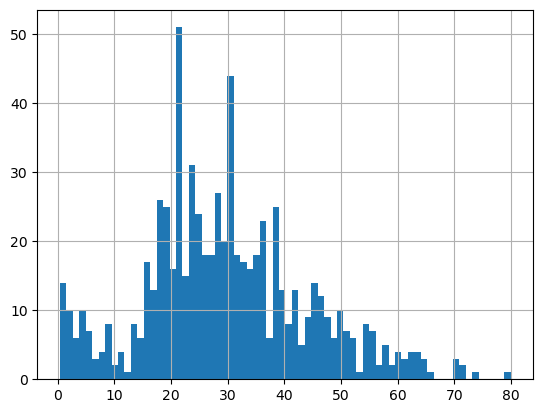

In [14]:
titanic_df['Age'].hist(bins=70)

In [15]:
titanic_df['Age'].mean()

29.69911764705882

In [16]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


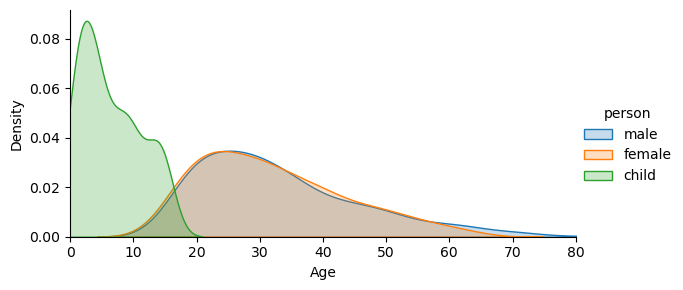

In [17]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=2)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [18]:
# Conclusion:
# The distribution of ages between males and females on Titanic are equal

C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\mau_a\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


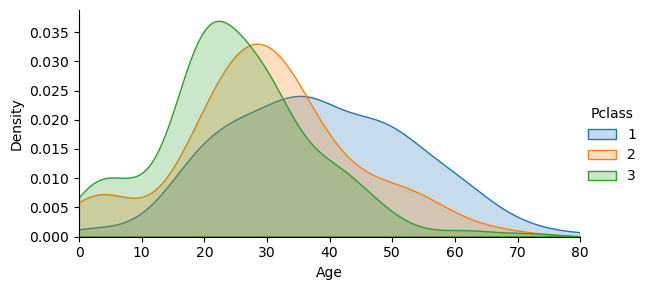

In [19]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=2)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
# Conclusion:
# We can see that there is more younger people in the Third->Second->First class

###### 2) What deck were the passengers on and how does that relate to their class?

In [22]:
deck=titanic_df['Cabin'].dropna()

In [23]:
deck.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [24]:
count_series = titanic_df.groupby(['Cabin','Pclass']).size()
count_series

Cabin  Pclass
A10    1         1
A14    1         1
A16    1         1
A19    1         1
A20    1         1
                ..
F33    2         3
F38    3         1
F4     2         2
G6     3         4
T      1         1
Length: 147, dtype: int64

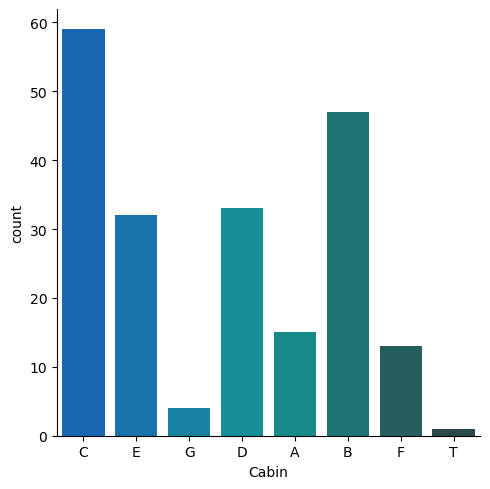

In [25]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=pd.DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot(x='Cabin',data=cabin_df,kind='count',palette='winter_d')

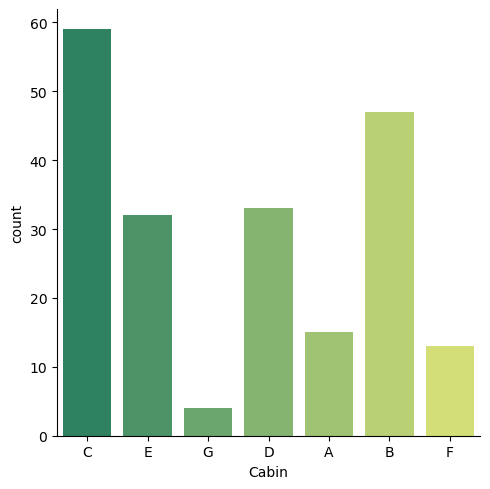

In [26]:
# There is no T cabin, or at least is missing the number following the letter, so let's remove this cabin
cabin_df=cabin_df[cabin_df.Cabin != 'T']
titanic_df['Cabin']=cabin_df
sns.catplot(x='Cabin',data=cabin_df,kind='count',palette='summer')

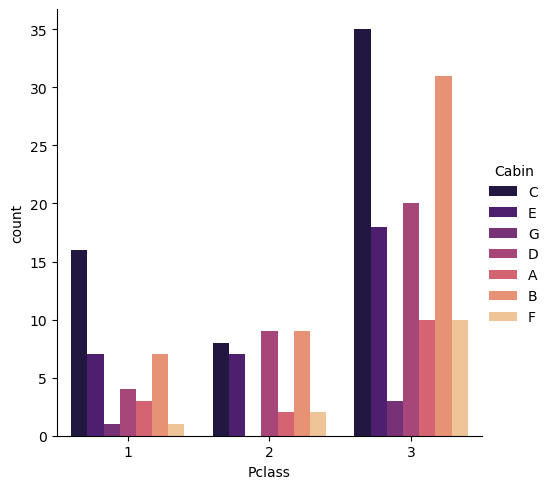

In [27]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=pd.DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Cabin',palette='magma')

In [28]:
# Conclusion:
# There is not much to notice abut the distribution of the Cabins in the Pclass, they look similar through the 3 classes

###### 3) Where did the passengers come from?

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,G,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,male


In [30]:
count_series2=titanic_df.groupby(['Embarked']).size()
count_series2

Embarked
C    168
Q     77
S    644
dtype: int64

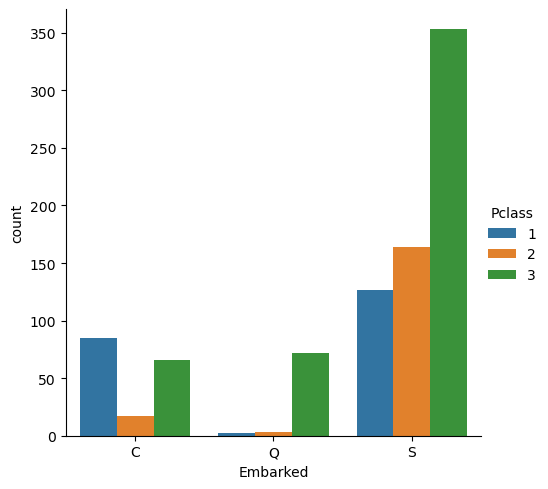

In [31]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [32]:
# Conclusions:
# People that embarked from city Q is almost all using third class

###### 4) Who was alone and who was with family?

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,G,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,male


In [34]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [35]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'


C:\Users\mau_a\AppData\Local\Temp\ipykernel_4708\1390825922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'


In [36]:
titanic_df.groupby(['Alone']).size()

Alone
Alone          537
With Family    354
dtype: int64

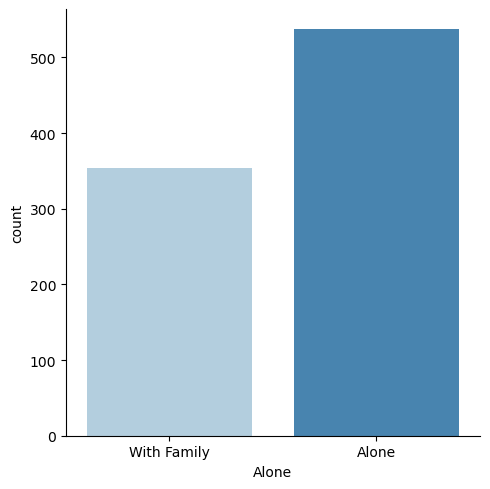

In [37]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

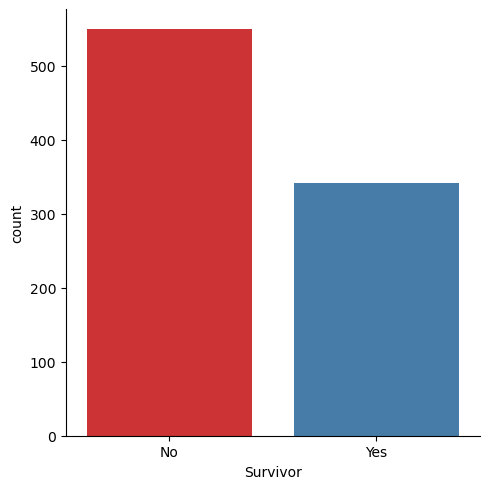

In [38]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'No',1:'Yes'})
sns.catplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')

###### 5) What factors helped someone survive the sinking?

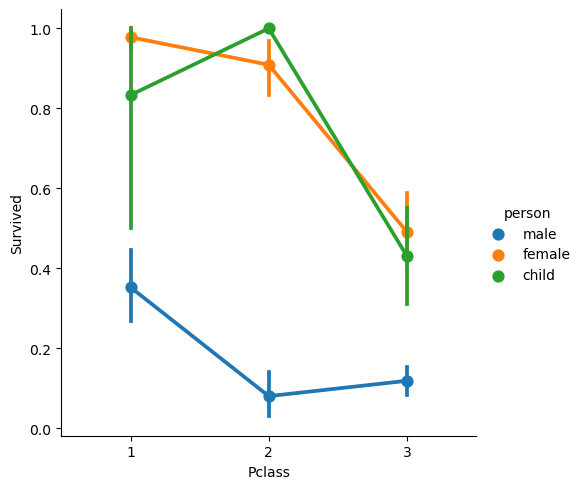

In [39]:
sns.catplot(x='Pclass',y='Survived',hue='person',data=titanic_df,kind='point')

In [40]:
# Conclusion:
# In this graph it's important to consider not only the Pclass but the gender, considering we have much more men in the Titanic and much more men than women in the third Pclass
# At the end of the day, men didn't survived as much as women and children, specially on the lower classes

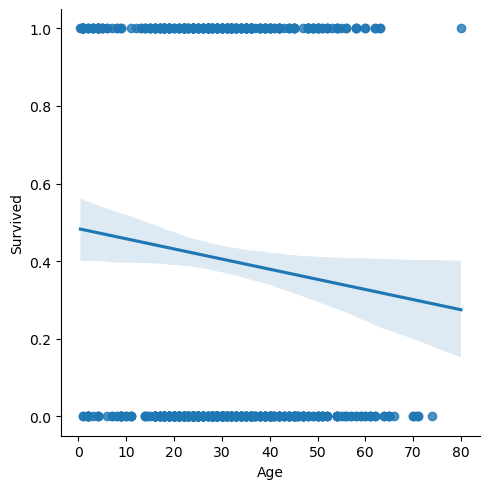

In [41]:
#Let's now understand how the age affects the survival rate
sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [42]:
# Conclusion:
# We can notice that exists a relationship between survivor rate and the age 

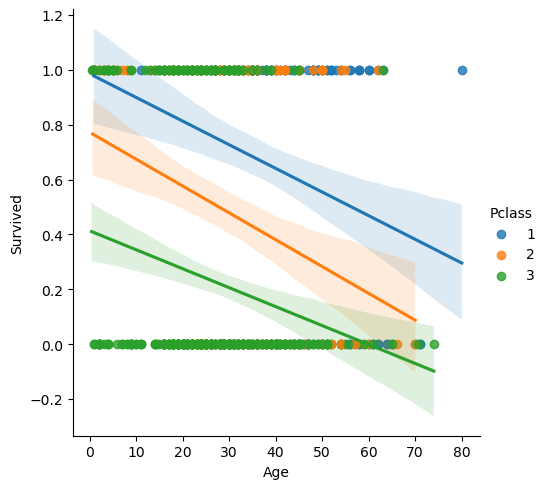

In [43]:
# Let's now check the same relation now considering a hue=Pclass to see how the Pclass relate to the survival rate too
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass')

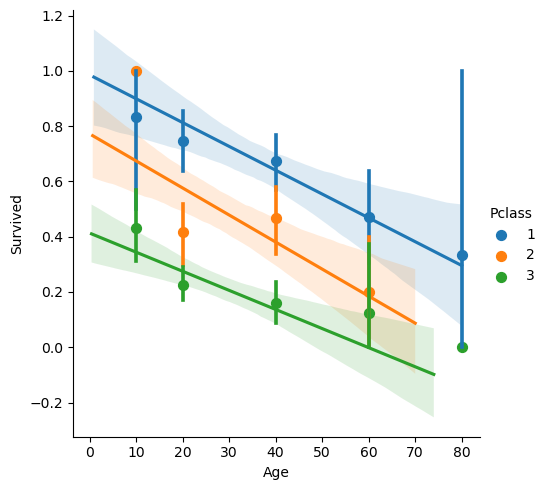

In [44]:
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',data=titanic_df,x_bins=generations,hue='Pclass')

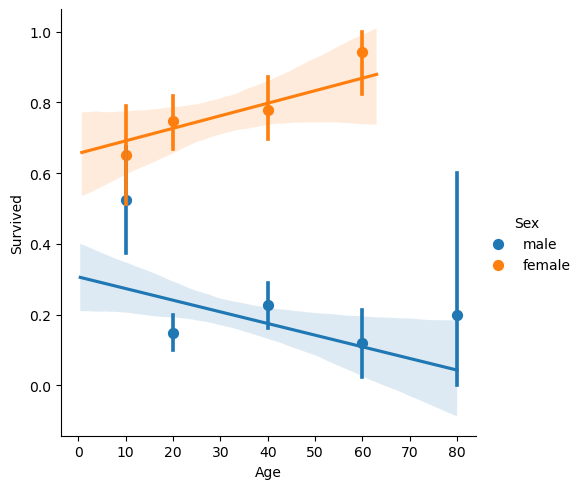

In [45]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,x_bins=generations,hue='Sex')

In [46]:
# Conclusion:
# We can notice that for male the rate of survival decreases as the men get's older
# While for women the reate of survive increases as the women get's older

###### 6) Did the deck have an effect on the passengers survival rate? 

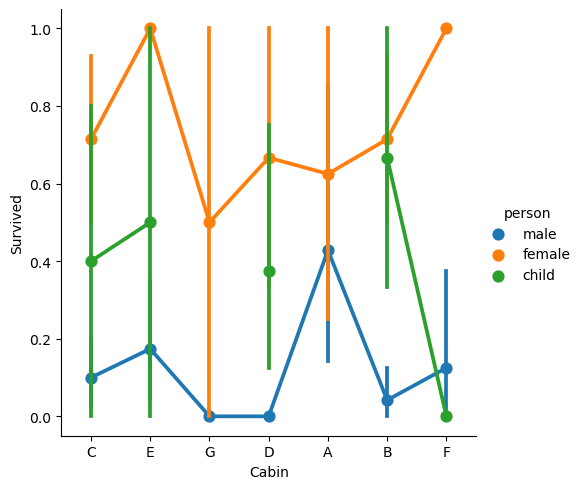

In [50]:
sns.catplot(x='Cabin',y='Survived',hue='person',data=titanic_df,kind='point')

In [ ]:
# The deck of the cabin doesn't appear to have a close relation with the survival rate

###### 7) Did having a family member increase the odds of surviving the crash?

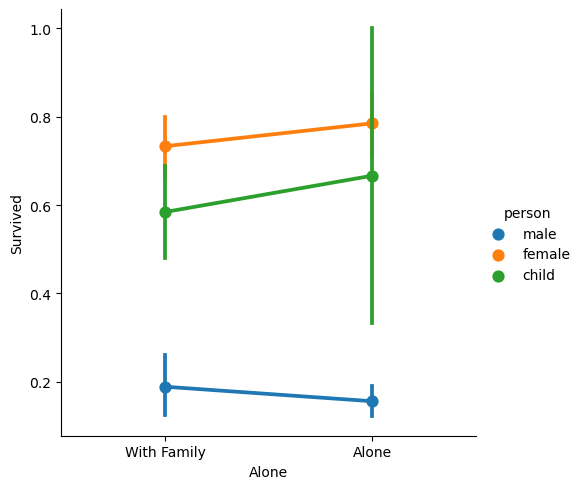

In [54]:
sns.catplot(x='Alone',y='Survived',hue='person',data=titanic_df,kind='point')

In [55]:
# Conclusion:
# For women and children having family increases the rate of survival